In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## **Data Cleaning**



*   Remove duplicates, NA values and outliers from london_earnings_by_borough data
*   Normalize wages using UK_inflation data to adjust for inflation



In [2]:
import pandas as pd
df1 = pd.read_csv('/content/gdrive/MyDrive/data/project_london/london_earnings_by_borough.csv')
df1.head()

,year,area_code,area,identity,pay_type,pay,confidence
0,2002,00AA,City of London,Female,Hourly,NaN,NaN
1,2003,00AA,City of London,Female,Hourly,NaN,NaN
2,2004,00AA,City of London,Female,Hourly,NaN,NaN
3,2005,00AA,City of London,Female,Hourly,NaN,NaN
4,2006,00AA,City of London,Female,Hourly,NaN,NaN


In [3]:
# By using str.replace()
df1['identity'] = df1['identity'].str.replace('Part-Time','Part-time')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6768 entries, 0 to 6767
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        6768 non-null   int64  
 1   area_code   6768 non-null   object 
 2   area        6768 non-null   object 
 3   identity    6768 non-null   object 
 4   pay_type    6768 non-null   object 
 5   pay         6607 non-null   float64
 6   confidence  6598 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 370.2+ KB


In [6]:
df1 = df1.dropna()
df1.isnull().values.any()

False

In [7]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = df1[df1.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,year,area_code,area,identity,pay_type,pay,confidence


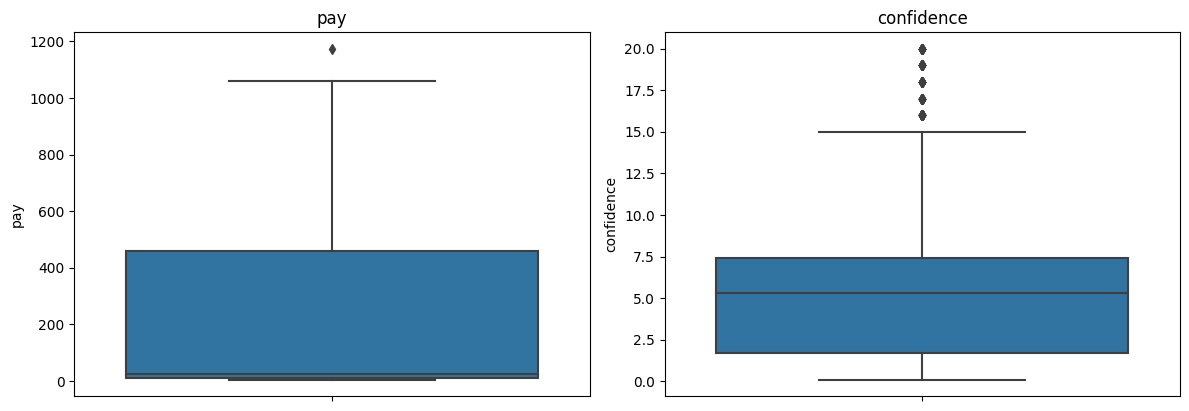

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 3)
sns.boxplot(data=df1, y='pay')
plt.title('pay')

plt.subplot(2, 2, 4)
sns.boxplot(data=df1, y='confidence')
plt.title('confidence')

plt.tight_layout()
plt.show()

In [9]:
# Define the column name to analyze
column_name = 'confidence'

# Calculate the quartiles and interquartile range
Q1 = df1[column_name].quantile(0.25)
Q3 = df1[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df1[(df1[column_name] < lower_bound) | (df1[column_name] > upper_bound)]

# Remove outliers from the DataFrame
df1 = df1[(df1[column_name] >= lower_bound) & (df1[column_name] <= upper_bound)]


In [10]:
# Define the column name to analyze
column_name = 'pay'

# Calculate the quartiles and interquartile range
Q1 = df1[column_name].quantile(0.25)
Q3 = df1[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df1[(df1[column_name] < lower_bound) | (df1[column_name] > upper_bound)]

# Remove outliers from the DataFrame
df1 = df1[(df1[column_name] >= lower_bound) & (df1[column_name] <= upper_bound)]


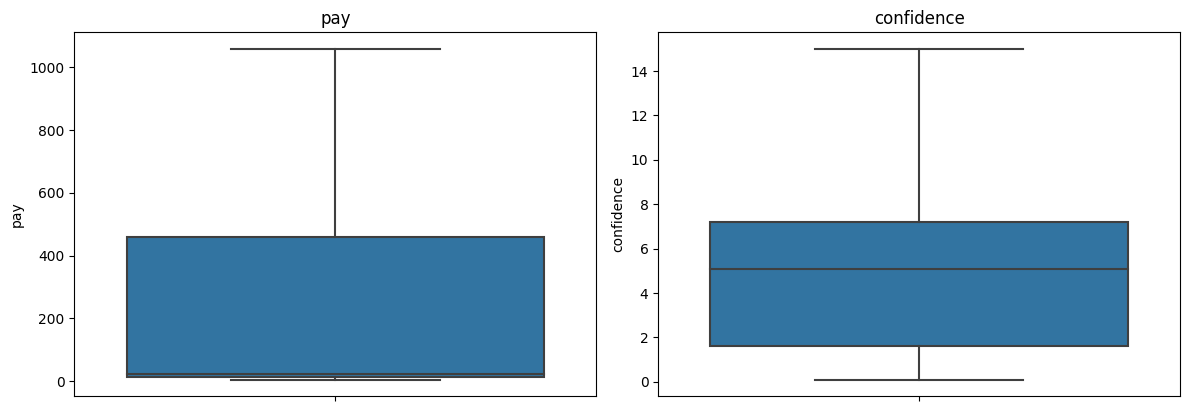

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 3)
sns.boxplot(data=df1, y='pay')
plt.title('pay')

plt.subplot(2, 2, 4)
sns.boxplot(data=df1, y='confidence')
plt.title('confidence')

plt.tight_layout()
plt.show()

In [12]:
import pandas as pd
df2 = pd.read_csv('/content/gdrive/MyDrive/data/project_london/UK_inflation.csv')
df2.head()

,year,inflation,multiplier
0,2018,NaN,1.00
1,2017,0.036,1.04
2,2016,0.018,1.05
3,2015,0.010,1.07
4,2014,0.024,1.09


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        268 non-null    int64  
 1   inflation   267 non-null    float64
 2   multiplier  268 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 6.4 KB


In [14]:
df2.rename(columns = {'inflation':'inflation_rate'}, inplace = True)
df2.rename(columns = {'multiplier':'inflation_multiplier'}, inplace = True)
df2.head()

,year,inflation_rate,inflation_multiplier
0,2018,NaN,1.00
1,2017,0.036,1.04
2,2016,0.018,1.05
3,2015,0.010,1.07
4,2014,0.024,1.09


## **Feature Engineering on Borough-Level**

From london_economic_activity data:
- Workforce participation rate by gender

In [15]:
import pandas as pd
df3 = pd.read_csv('/content/gdrive/MyDrive/data/project_london/london_economic_activity.csv')
df3.head()

,year,area_code,area,gender,economically_active,working_age,percent,confidence
0,Jan 2005-Dec 2005,00AA,City of London,F,2400.0,3600.0,64.4,NaN
1,Jan 2006-Dec 2006,00AA,City of London,F,NaN,NaN,NaN,NaN
2,Jan 2007-Dec 2007,00AA,City of London,F,NaN,1400.0,NaN,NaN
3,Jan 2008-Dec 2008,00AA,City of London,F,1200.0,1200.0,100.0,NaN
4,Jan 2009-Dec 2009,00AA,City of London,F,NaN,NaN,NaN,NaN


In [16]:
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'df'

# Group the data by gender and calculate the total population and total workforce by gender
grouped = df3.groupby('gender').agg({
    'working_age': 'sum',
    'economically_active': 'sum'
})

# Calculate the workforce participation rate by gender
grouped['participation_rate'] = (grouped['economically_active'] / grouped['working_age']) * 100

# Display the result
print(grouped)


         working_age  economically_active  participation_rate
gender                                                       
F       1.475390e+09         1.051360e+09           71.259790
M       1.454075e+09         1.208712e+09           83.125853


From london_taxpayer_income data:
- Average income by borough
- Median income by borough

In [17]:
df4 = pd.read_csv('/content/gdrive/MyDrive/data/project_london/london_taxpayer_income.csv')
df4.head()

,year,area_code,area,population,mean_income,median_income
0,1999-2000,00AA,City of London,10000,109800,40400
1,2000-2001,00AA,City of London,10000,137000,65000
2,2001-2002,00AA,City of London,12000,92900,38300
3,2002-2003,00AA,City of London,11000,78700,37000
4,2003-2004,00AA,City of London,10000,85800,39200


In [18]:
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'df'

# Group the data by borough and calculate the average and median income
grouped = df4.groupby('area').agg({
    'mean_income': 'mean',
    'median_income': 'median'
})

# Display the result
print(grouped)


                            mean_income  median_income
area                                                  
Barking and Dagenham       21938.888889        19000.0
Barnet                     38722.222222        23050.0
Bexley                     26205.555556        20950.0
Brent                      26294.444444        18950.0
Bromley                    34555.555556        24050.0
Camden                     63727.777778        27650.0
City of London            119200.000000        57800.0
Croydon                    28127.777778        21450.0
Ealing                     30383.333333        20500.0
East Midlands              23983.333333        18200.0
East of England            28338.888889        19900.0
Enfield                    28450.000000        20400.0
England                    27427.777778        19200.0
Greenwich                  29361.111111        20900.0
Hackney                    29172.222222        21550.0
Hammersmith and Fulham     50038.888889        25150.0
Haringey  

From voa_average_rent_borough:
- Average rent prices by borough

In [19]:
df5 = pd.read_csv('/content/gdrive/MyDrive/data/project_london/voa-average-rent-borough.csv')
df5.head()

,Name,Private Rental Market Statistics
0,ShortName,Average rents in the private sector
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,Theme,Housing


## **Models**
Fit separate linear regression models to predict:
- Women's wages by borough
- Men's wages by borough
- Part time workers' wages by borough
- Full time workers' wages by borough
- Borough-level economic and labor market features as predictors

In [20]:
f1 = df1[['year',	'area',	'identity'	,'pay_type',	'pay'	,'confidence']]
# Change the data type of 'Column1' to object
f1['year'] = f1['year'].astype(object)
f1 = f1.dropna()
f1['year'] = f1['year'].astype(str)
f1['year'] = f1['year'].str.strip()
f2 = df4[['year','area',	'population',	'mean_income',	'median_income']]
f2['year'] = f2['year'].str.split('-').str[1]


<ipython-input-20-d5c8e7d75d96>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['year'] = f1['year'].astype(object)
<ipython-input-20-d5c8e7d75d96>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f2['year'] = f2['year'].str.split('-').str[1]


In [22]:
data = pd.merge(f1, f2, on='year')
data = data[data['area_x'] == data['area_y']].copy()
data = data [['year','area_x','identity','pay_type','pay','confidence','population','mean_income','median_income']]
data.rename(columns = {'area_x':'area'}, inplace = True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5238 entries, 1 to 269074
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           5238 non-null   object 
 1   area           5238 non-null   object 
 2   identity       5238 non-null   object 
 3   pay_type       5238 non-null   object 
 4   pay            5238 non-null   float64
 5   confidence     5238 non-null   float64
 6   population     5238 non-null   int64  
 7   mean_income    5238 non-null   int64  
 8   median_income  5238 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 409.2+ KB


,year,area,identity,pay_type,pay,confidence,population,mean_income,median_income
1,2002,Barking and Dagenham,Female,Hourly,8.41,5.8,56000,18600,16200
49,2002,Barnet,Female,Hourly,9.50,7.1,159000,30400,18700
97,2002,Bexley,Female,Hourly,9.20,6.3,112000,22000,18300
145,2002,Brent,Female,Hourly,9.30,8.7,127000,21100,16500
193,2002,Bromley,Female,Hourly,10.50,6.6,164000,27400,19100


Women's wages by borough

In [25]:
women =  data[data.identity == 'Female']
women.head()

,year,area,identity,pay_type,pay,confidence,population,mean_income,median_income
1,2002,Barking and Dagenham,Female,Hourly,8.41,5.8,56000,18600,16200
49,2002,Barnet,Female,Hourly,9.50,7.1,159000,30400,18700
97,2002,Bexley,Female,Hourly,9.20,6.3,112000,22000,18300
145,2002,Brent,Female,Hourly,9.30,8.7,127000,21100,16500
193,2002,Bromley,Female,Hourly,10.50,6.6,164000,27400,19100


In [31]:
import pandas as pd
import statsmodels.api as sm


# Split the dataset by borough
boroughs = women['area'].unique()

# Fit separate linear regression models for each borough
models = {}
for borough in boroughs:
    subset = women[women['area'] == borough]
    X = subset[['confidence','population','mean_income','median_income']]  # Independent variable
    X = sm.add_constant(X)  # Add a constant term for intercept
    y = subset['pay']  # Dependent variable
    
    model = sm.OLS(y, X).fit()  # Fit the linear regression model
    models[borough] = model

# Print the summary of each model
for borough, model in models.items():
    print(f"Regression model for {borough}")
    print(model.summary())
    print("--------------------------------------")



Regression model for Barking and Dagenham
                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     4.731
Date:                Sat, 27 May 2023   Prob (F-statistic):            0.00505
Time:                        06:41:23   Log-Likelihood:                -201.22
No. Observations:                  32   AIC:                             412.4
Df Residuals:                      27   BIC:                             419.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
cons

Men's wages by borough

In [30]:
men =  data[data.identity == 'Male']
men.head()

,year,area,identity,pay_type,pay,confidence,population,mean_income,median_income
8649,2002,Barking and Dagenham,Male,Hourly,11.5,4.8,56000,18600,16200
8697,2002,Barnet,Male,Hourly,13.5,7.2,159000,30400,18700
8745,2002,Bexley,Male,Hourly,12.1,6.1,112000,22000,18300
8793,2002,Brent,Male,Hourly,10.0,7.0,127000,21100,16500
8841,2002,Bromley,Male,Hourly,14.8,7.6,164000,27400,19100


In [32]:
import pandas as pd
import statsmodels.api as sm


# Split the dataset by borough
boroughs = men['area'].unique()

# Fit separate linear regression models for each borough
models = {}
for borough in boroughs:
    subset = men[men['area'] == borough]
    X = subset[['confidence','population','mean_income','median_income']]  # Independent variable
    X = sm.add_constant(X)  # Add a constant term for intercept
    y = subset['pay']  # Dependent variable
    
    model = sm.OLS(y, X).fit()  # Fit the linear regression model
    models[borough] = model

# Print the summary of each model
for borough, model in models.items():
    print(f"Regression model for {borough}")
    print(model.summary())
    print("--------------------------------------")



Regression model for Barking and Dagenham
                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.124
Method:                 Least Squares   F-statistic:                    0.1468
Date:                Sat, 27 May 2023   Prob (F-statistic):              0.963
Time:                        06:42:07   Log-Likelihood:                -220.95
No. Observations:                  32   AIC:                             451.9
Df Residuals:                      27   BIC:                             459.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
cons

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Part time workers' wages by borough

In [34]:
parttime_worker =  data[data.identity == 'Part-time']
parttime_worker.head()

,year,area,identity,pay_type,pay,confidence,population,mean_income,median_income
12879,2002,Barking and Dagenham,Part-time,Hourly,6.92,11.0,56000,18600,16200
12927,2002,Barnet,Part-time,Hourly,7.60,7.9,159000,30400,18700
12975,2002,Bexley,Part-time,Hourly,6.90,7.6,112000,22000,18300
13023,2002,Brent,Part-time,Hourly,6.10,5.3,127000,21100,16500
13071,2002,Bromley,Part-time,Hourly,7.90,11.0,164000,27400,19100


In [35]:
import pandas as pd
import statsmodels.api as sm


# Split the dataset by borough
boroughs = parttime_worker['area'].unique()

# Fit separate linear regression models for each borough
models = {}
for borough in boroughs:
    subset = parttime_worker[parttime_worker['area'] == borough]
    X = subset[['confidence','population','mean_income','median_income']]  # Independent variable
    X = sm.add_constant(X)  # Add a constant term for intercept
    y = subset['pay']  # Dependent variable
    
    model = sm.OLS(y, X).fit()  # Fit the linear regression model
    models[borough] = model

# Print the summary of each model
for borough, model in models.items():
    print(f"Regression model for {borough}")
    print(model.summary())
    print("--------------------------------------")



Regression model for Barking and Dagenham
                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     6.073
Date:                Sat, 27 May 2023   Prob (F-statistic):            0.00173
Time:                        06:42:53   Log-Likelihood:                -150.43
No. Observations:                  28   AIC:                             310.9
Df Residuals:                      23   BIC:                             317.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
cons

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     13.09
Date:                Sat, 27 May 2023   Prob (F-statistic):           5.71e-06
Time:                        06:42:53   Log-Likelihood:                -161.08
No. Observations:                  31   AIC:                             332.2
Df Residuals:                      26   BIC:                             339.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -512.7421    166.523     -3.079

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Full time workers' wages by borough

In [37]:
fulltime_worker =  data[data.identity == 'Full-time']
fulltime_worker.head()

,year,area,identity,pay_type,pay,confidence,population,mean_income,median_income
4325,2002,Barking and Dagenham,Full-time,Hourly,10.98,4.8,56000,18600,16200
4373,2002,Barnet,Full-time,Hourly,13.10,4.7,159000,30400,18700
4421,2002,Bexley,Full-time,Hourly,11.70,4.9,112000,22000,18300
4469,2002,Brent,Full-time,Hourly,10.90,4.6,127000,21100,16500
4517,2002,Bromley,Full-time,Hourly,13.30,4.7,164000,27400,19100


In [38]:
import pandas as pd
import statsmodels.api as sm


# Split the dataset by borough
boroughs = fulltime_worker['area'].unique()

# Fit separate linear regression models for each borough
models = {}
for borough in boroughs:
    subset = fulltime_worker[fulltime_worker['area'] == borough]
    X = subset[['confidence','population','mean_income','median_income']]  # Independent variable
    X = sm.add_constant(X)  # Add a constant term for intercept
    y = subset['pay']  # Dependent variable
    
    model = sm.OLS(y, X).fit()  # Fit the linear regression model
    models[borough] = model

# Print the summary of each model
for borough, model in models.items():
    print(f"Regression model for {borough}")
    print(model.summary())
    print("--------------------------------------")



Regression model for Barking and Dagenham
                            OLS Regression Results                            
Dep. Variable:                    pay   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                 -0.077
Method:                 Least Squares   F-statistic:                    0.4476
Date:                Sat, 27 May 2023   Prob (F-statistic):              0.773
Time:                        06:43:56   Log-Likelihood:                -220.36
No. Observations:                  32   AIC:                             450.7
Df Residuals:                      27   BIC:                             458.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
cons

## **Synthetic Control**
- For each workforce category, generate synthetic control predictions for Newham
post-2012
- Compare actual Newham wage changes to synthetic predictions to estimate causal
effect

In [40]:
newham =  data[data.area == 'Newham']
newham.head()

,year,area,identity,pay_type,pay,confidence,population,mean_income,median_income
1105,2002,Newham,Female,Hourly,8.6,9.1,88000,17700,15300
3267,2002,Newham,Female,Weekly,301.6,9.4,88000,17700,15300
5429,2002,Newham,Full-time,Hourly,9.6,5.8,88000,17700,15300
7591,2002,Newham,Full-time,Weekly,384.0,4.7,88000,17700,15300
9706,2002,Newham,Male,Hourly,8.5,5.7,88000,17700,15300


In [42]:
newham.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 1105 to 268112
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           127 non-null    object 
 1   area           127 non-null    object 
 2   identity       127 non-null    object 
 3   pay_type       127 non-null    object 
 4   pay            127 non-null    float64
 5   confidence     127 non-null    float64
 6   population     127 non-null    int64  
 7   mean_income    127 non-null    int64  
 8   median_income  127 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 9.9+ KB


In [47]:
import pandas as pd

# Sort the data by year
data = data.sort_values('year')
# Convert single column to int dtype.
data['year'] = data['year'].astype('int')

# Specify the year for splitting pre- and post-wages
split_year = 2012

# Split the wages into pre- and post-wages based on the year
data['pre_wages'] = data[data['year'] < split_year]['pay']
data['post_wages'] = data[data['year'] >= split_year]['pay']
data.head()

,year,area,identity,pay_type,pay,confidence,population,mean_income,median_income,pre_wages,post_wages
1,2002,Barking and Dagenham,Female,Hourly,8.41,5.8,56000,18600,16200,8.41,NaN
12301,2002,North West,Male,Weekly,393.10,1.0,3190000,18800,14600,393.10,NaN
97,2002,Bexley,Female,Hourly,9.20,6.3,112000,22000,18300,9.20,NaN
145,2002,Brent,Female,Hourly,9.30,8.7,127000,21100,16500,9.30,NaN
193,2002,Bromley,Female,Hourly,10.50,6.6,164000,27400,19100,10.50,NaN


In [50]:
!pip install causalimpact

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
import pandas as pd
from causalimpact import CausalImpact

# Select the relevant columns for analysis (e.g., workforce category, pre-2012 wages, post-2012 wages)
# Replace 'workforce_category', 'pre_wages', and 'post_wages' with the actual column names in your dataset
df = data[['year','identity', 'area','pay']].copy()

# Filter the data for Newham and post-2012 period
newham_data = df[(df['area'] == 'Newham') & (df['year'] >= 2012)].copy()

# Create a control group by selecting other boroughs
control_data = df[(df['area'] != 'Newham') & (df['year'] >= 2012)].copy()

# Prepare the data for CausalImpact analysis
pre_period = [2010, 2011]  # Pre-2012 period
post_period = [2012, 2013, 2014, 2015]  # Post-2012 period

# Rename columns to match expected format
newham_data.columns = ['year', 'identity', 'area','pay']
control_data.columns = ['year', 'identity', 'area','pay']

# Set 'date' column as index
newham_data.set_index('year', inplace=True)
control_data.set_index('year', inplace=True)

# Run CausalImpact analysis
ci = CausalImpact(newham_data, control_data, pre_period, post_period)

# Print the summary of the analysis
print(ci.summary())

AttributeError: ignored